# Load資料

In [707]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy, time
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

%matplotlib inline

data_path = '/Users/maylin/Documents/Data/Midterm/'
df_train = pd.read_csv(data_path + 'train_data.csv')
df_test = pd.read_csv(data_path + 'test_data.csv')

In [708]:
#df_train.head()
#df_test.head()
df_train.dtypes
#df_test.dtypes
#df_train.shape #(113, 22)
#df_test.shape #(33, 21)

name                          object
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
expenses                     float64
from_messages                float64
from_poi_to_this_person      float64
from_this_person_to_poi      float64
loan_advances                float64
long_term_incentive          float64
other                        float64
poi                             bool
restricted_stock             float64
restricted_stock_deferred    float64
salary                       float64
shared_receipt_with_poi      float64
to_messages                  float64
total_payments               float64
total_stock_value            float64
dtype: object

In [709]:
# 先把train的poi更改成int(Ture-->1,False-->0)
df_train.poi = df_train.poi.astype(int)
#df_train.poi.head(20)
df_train.head(20)

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,1,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,1,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,1,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,1,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,1,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,HIRKO JOSEPH,NaN,10259.0,NaN,NaN,joe.hirko@enron.com,30766064.0,77978.0,NaN,NaN,...,NaN,2856.0,1,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,YEAGER F SCOTT,NaN,NaN,NaN,NaN,scott.yeager@enron.com,8308552.0,53947.0,NaN,NaN,...,NaN,147950.0,1,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,COLWELL WESLEY,1200000.0,27610.0,-144062.0,NaN,wes.colwell@enron.com,NaN,16514.0,40.0,240.0,...,NaN,101740.0,1,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,LAY KENNETH L,7000000.0,202911.0,-300000.0,NaN,kenneth.lay@enron.com,34348384.0,99832.0,36.0,123.0,...,3600000.0,10359729.0,1,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,GLISAN JR BEN F,600000.0,NaN,NaN,NaN,ben.glisan@enron.com,384728.0,125978.0,16.0,52.0,...,71023.0,200308.0,1,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


In [710]:
df_test.head(20)

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0
5,HICKERSON GARY J,1700000.0,NaN,NaN,NaN,gary.hickerson@enron.com,NaN,98849.0,27.0,40.0,...,NaN,69223.0,1936.0,441096.0,NaN,211788.0,900.0,1320.0,2081796.0,441096.0
6,FREVERT MARK A,2000000.0,6426990.0,-3367011.0,NaN,mark.frevert@enron.com,10433518.0,86987.0,21.0,242.0,...,2000000.0,1617011.0,7427621.0,4188667.0,NaN,1060932.0,2979.0,3275.0,17252530.0,14622185.0
7,CHAN RONNIE,NaN,NaN,-98784.0,98784.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,32460.0,-32460.0,NaN,NaN,NaN,NaN,NaN
8,DONAHUE JR JEFFREY M,800000.0,NaN,-300000.0,NaN,jeff.donahue@enron.com,765920.0,96268.0,22.0,188.0,...,NaN,NaN,891.0,315068.0,NaN,278601.0,772.0,865.0,875760.0,1080988.0
9,REYNOLDS LAWRENCE,100000.0,51365.0,-200000.0,NaN,NaN,4160672.0,8409.0,NaN,NaN,...,NaN,156250.0,202052.0,201483.0,-140264.0,76399.0,NaN,NaN,394475.0,4221891.0


In [711]:
# Test和Train的資料合併
train_Y = df_train['poi']
ids = df_test['name']
train_num = train_Y.shape[0] #113 到時候用來切資料
df_train = df_train.drop(['poi','name','email_address'] , axis=1)
df_test = df_test.drop(['name','email_address'] , axis=1)
df = pd.concat([df_train,df_test]) # df_train:0-112 , df_test:0-32
df

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
5,NaN,10259.0,NaN,NaN,30766064.0,77978.0,NaN,NaN,NaN,NaN,NaN,2856.0,NaN,NaN,NaN,NaN,NaN,91093.0,30766064.0
6,NaN,NaN,NaN,NaN,8308552.0,53947.0,NaN,NaN,NaN,NaN,NaN,147950.0,3576206.0,NaN,158403.0,NaN,NaN,360300.0,11884758.0
7,1200000.0,27610.0,-144062.0,NaN,NaN,16514.0,40.0,240.0,11.0,NaN,NaN,101740.0,698242.0,NaN,288542.0,1132.0,1758.0,1490344.0,698242.0
8,7000000.0,202911.0,-300000.0,NaN,34348384.0,99832.0,36.0,123.0,16.0,81525000.0,3600000.0,10359729.0,14761694.0,NaN,1072321.0,2411.0,4273.0,103559793.0,49110078.0
9,600000.0,NaN,NaN,NaN,384728.0,125978.0,16.0,52.0,6.0,NaN,71023.0,200308.0,393818.0,NaN,274975.0,874.0,873.0,1272284.0,778546.0


# 補空值

In [712]:
# 檢查 DataFrame 空缺值的狀態，查看空值率
def na_check(df_data):
    data_na = (df_data.isnull().sum() / len(df_data)) * 100
    data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)
    missing_data = pd.DataFrame({'Missing Ratio' :data_na})
    display(missing_data.head(10))

na_check(df)

,Missing Ratio
loan_advances,97.260274
director_fees,88.356164
restricted_stock_deferred,87.671233
deferral_payments,73.287671
deferred_income,66.438356
long_term_incentive,54.794521
bonus,43.835616
from_this_person_to_poi,41.095890
from_poi_to_this_person,41.095890
from_messages,41.095890


In [713]:
# 方法一：空值補 -1, 做羅吉斯迴歸，會給出機率
df_m1 = df.fillna(-1)
train_X = df_m1[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7608695652173914

In [714]:
# 方法二：空值補 0, 做羅吉斯迴歸
df_0 = df.fillna(0)
train_X = df_0[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.7877470355731224

In [715]:
# 方法三：空值補平均值
df_mn = df.fillna(df.mean())
train_X = df_mn[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.9023715415019762

In [716]:
# 方法四：空值補 -1, 搭配最大最小化
df = df.fillna(-1)
df_temp = MinMaxScaler().fit_transform(df)
train_X = df_temp[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8853754940711462

In [717]:
# 方法五：搭配標準化
df_temp = StandardScaler().fit_transform(df)
train_X = df_temp[:train_num]
estimator = LogisticRegression(solver='lbfgs')
cross_val_score(estimator, train_X, train_Y, cv=5).mean()

0.8766798418972332

In [718]:
#方法三：空值補平均值 最好
df_mn

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1.750000e+06,1.642674e+06,-3.504386e+06,1.668049e+05,1.979418e+07,4.695000e+04,18.000000,42.000000,4.000000,41962500.0,1.617011e+06,1.748390e+05,2.748364e+06,1.664106e+05,4.206360e+05,864.000000,905.000000,5.050500e+05,2.254254e+07
1,5.600000e+06,1.642674e+06,-1.140475e+06,1.668049e+05,1.925000e+07,2.933600e+04,108.000000,88.000000,30.000000,41962500.0,1.920000e+06,2.212200e+04,6.843672e+06,1.664106e+05,1.111258e+06,2042.000000,3627.000000,8.682716e+06,2.609367e+07
2,2.000000e+05,1.642674e+06,-4.167000e+03,1.668049e+05,1.624396e+06,2.288400e+04,39.000000,13.000000,14.000000,41962500.0,1.470361e+06,1.573324e+06,8.692200e+05,1.664106e+05,2.118440e+05,91.000000,225.000000,2.003885e+06,2.493616e+06
3,8.000000e+05,1.642674e+06,-1.140475e+06,1.668049e+05,5.987054e+06,1.181340e+05,608.790698,64.895349,41.232558,41962500.0,6.026710e+05,9.075020e+05,9.850320e+05,1.664106e+05,2.243050e+05,1176.465116,2073.860465,2.652612e+06,9.850320e+05
4,1.250000e+06,1.642674e+06,-2.625000e+05,1.668049e+05,5.987054e+06,3.581800e+04,144.000000,199.000000,25.000000,41962500.0,3.753040e+05,4.860000e+02,1.260270e+05,1.664106e+05,2.401890e+05,2188.000000,2598.000000,1.639297e+06,1.260270e+05
5,2.374235e+06,1.025900e+04,-1.140475e+06,1.668049e+05,3.076606e+07,7.797800e+04,608.790698,64.895349,41.232558,41962500.0,1.470361e+06,2.856000e+03,2.321741e+06,1.664106e+05,5.621943e+05,1176.465116,2073.860465,9.109300e+04,3.076606e+07
6,2.374235e+06,1.642674e+06,-1.140475e+06,1.668049e+05,8.308552e+06,5.394700e+04,608.790698,64.895349,41.232558,41962500.0,1.470361e+06,1.479500e+05,3.576206e+06,1.664106e+05,1.584030e+05,1176.465116,2073.860465,3.603000e+05,1.188476e+07
7,1.200000e+06,2.761000e+04,-1.440620e+05,1.668049e+05,5.987054e+06,1.651400e+04,40.000000,240.000000,11.000000,41962500.0,1.470361e+06,1.017400e+05,6.982420e+05,1.664106e+05,2.885420e+05,1132.000000,1758.000000,1.490344e+06,6.982420e+05
8,7.000000e+06,2.029110e+05,-3.000000e+05,1.668049e+05,3.434838e+07,9.983200e+04,36.000000,123.000000,16.000000,81525000.0,3.600000e+06,1.035973e+07,1.476169e+07,1.664106e+05,1.072321e+06,2411.000000,4273.000000,1.035598e+08,4.911008e+07
9,6.000000e+05,1.642674e+06,-1.140475e+06,1.668049e+05,3.847280e+05,1.259780e+05,16.000000,52.000000,6.000000,41962500.0,7.102300e+04,2.003080e+05,3.938180e+05,1.664106e+05,2.749750e+05,874.000000,873.000000,1.272284e+06,7.785460e+05


bonus


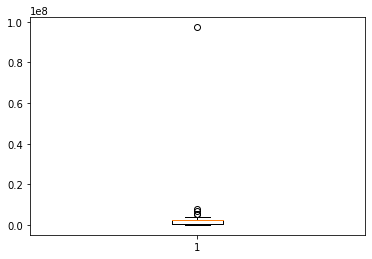

deferral_payments


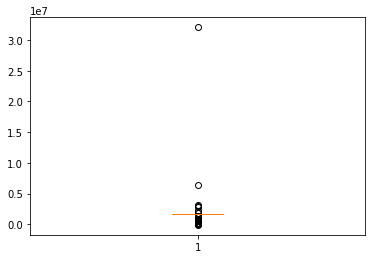

deferred_income


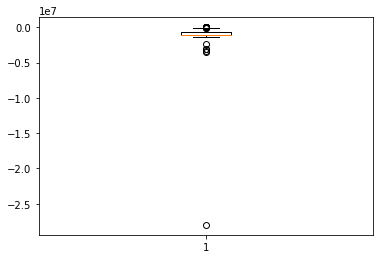

director_fees


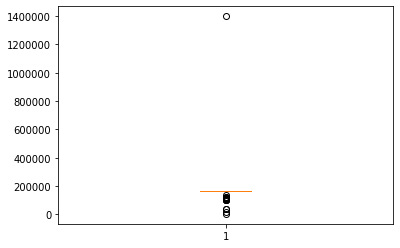

exercised_stock_options


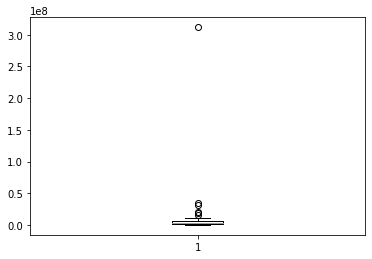

expenses


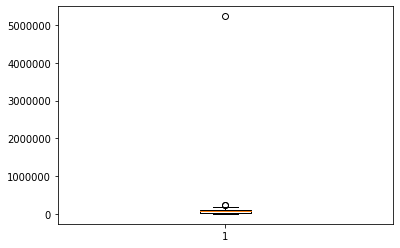

from_messages


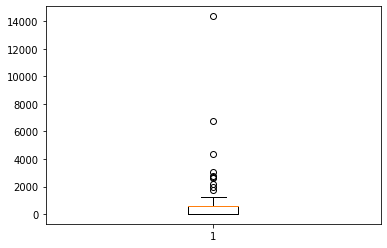

from_poi_to_this_person


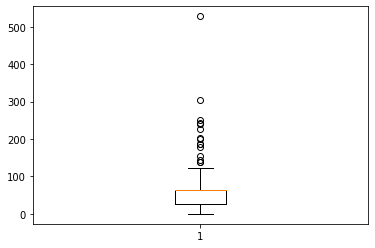

from_this_person_to_poi


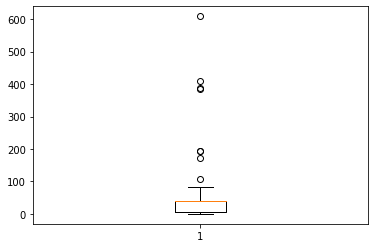

loan_advances


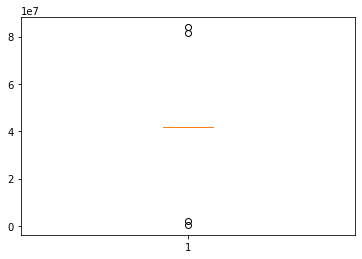

long_term_incentive


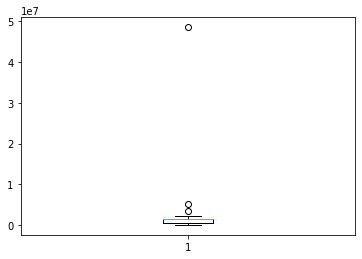

other


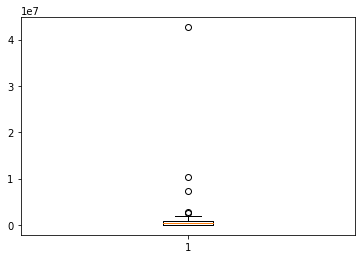

restricted_stock


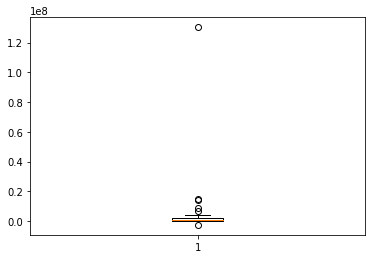

restricted_stock_deferred


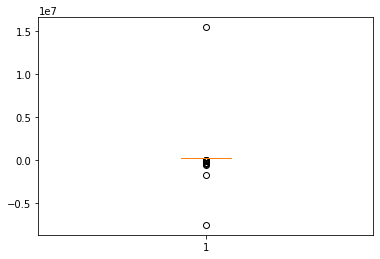

salary


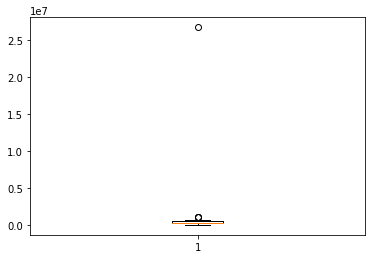

shared_receipt_with_poi


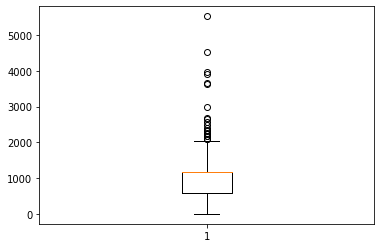

to_messages


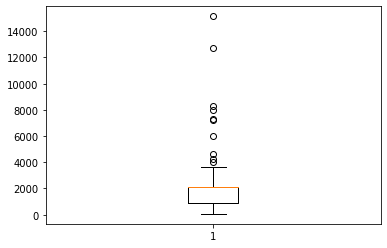

total_payments


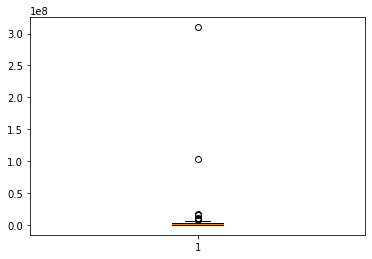

total_stock_value


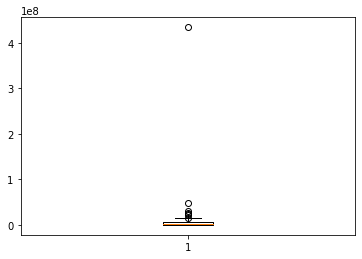

In [719]:
#看一下個欄位分佈圖，處理outliner
dtype_select = [float]
numeric_columns = list(df_mn.columns[list(df_mn.dtypes.isin(dtype_select))])
for col in numeric_columns:
    print(col)
    plt.boxplot(df_mn[col])
    plt.show()

In [720]:
## bonus
# 去除outlier
five_num = [0, 25, 50, 75, 100]
#np.percentile用于去除离群点，百分位数是统计中使用的度量，表示小于这个值的观察值占总数q的百分比。
quantile_5s = [np.percentile(df_mn[~df_mn['bonus'].isnull()]['bonus'], q = i) for i in five_num]
print(quantile_5s)

# Z轉換 標準化
value = df_mn['bonus'].values
df_mn['bonus'] = ( value - min(value) ) / ( max(value) - min(value) )

[70000.0, 712500.0, 2374234.6097560977, 2374234.6097560977, 97343619.0]


In [721]:
# 用 log 去偏態, 0 則直接取 0
df_mn["bonus"] = df_mn["bonus"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["deferral_payments"] = df_mn["deferral_payments"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["deferred_income"] = df_mn["deferred_income"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["director_fees"] = df_mn["director_fees"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["exercised_stock_options"] = df_mn["exercised_stock_options"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["expenses"] = df_mn["expenses"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["from_messages"] = df_mn["from_messages"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["from_poi_to_this_person"] = df_mn["from_poi_to_this_person"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["from_this_person_to_poi"] = df_mn["from_this_person_to_poi"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["loan_advances"] = df_mn["loan_advances"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["long_term_incentive"] = df_mn["long_term_incentive"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["other"] = df_mn["other"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["restricted_stock"] = df_mn["restricted_stock"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["restricted_stock_deferred"] = df_mn["restricted_stock_deferred"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["salary"] = df_mn["salary"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["shared_receipt_with_poi"] = df_mn["shared_receipt_with_poi"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["to_messages"] = df_mn["to_messages"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["total_payments"] = df_mn["total_payments"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn["total_stock_value"] = df_mn["total_stock_value"].map(lambda i: np.log(i) if i > 0 else 0)
df_mn

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,-4.058734,14.311836,0,12.024580,16.800898,10.756838,2.890372,3.737670,1.386294,17.552287,14.296090,12.071621,14.826516,12.022213,12.949523,6.761573,6.807935,13.132413,16.930915
1,-2.867340,14.311836,0,12.024580,16.773022,10.286571,4.682131,4.477337,3.401197,17.552287,14.467836,10.004328,15.738835,12.022213,13.921003,7.621685,8.196161,15.976845,17.077203
2,-6.617749,14.311836,0,12.024580,14.300647,10.038193,3.663562,2.564949,2.639057,17.552287,14.201019,14.268701,13.675352,12.022213,12.263605,4.510860,5.416100,14.510598,14.729244
3,-4.892239,14.311836,0,12.024580,15.605110,11.679575,6.411475,4.172776,3.719228,17.552287,13.309127,13.718451,13.800429,12.022213,12.320762,7.070270,7.637167,14.791055,13.800429
4,-4.412013,14.311836,0,12.024580,15.605110,10.486206,4.969813,5.293305,3.218876,17.552287,12.835492,6.186209,11.744251,12.022213,12.389181,7.690743,7.862497,14.309778,11.744251
5,-3.742779,9.235911,0,12.024580,17.241923,11.264182,6.411475,4.172776,3.719228,17.552287,14.201019,7.957177,14.657828,12.022213,13.239603,7.070270,7.637167,11.419636,17.241923
6,-3.742779,14.311836,0,12.024580,15.932796,10.895757,6.411475,4.172776,3.719228,17.552287,14.201019,11.904630,15.089813,12.022213,11.972898,7.070270,7.637167,12.794692,16.290767
7,-4.455310,10.225933,0,12.024580,15.605110,9.711964,3.688879,5.480639,2.397895,17.552287,14.201019,11.530176,13.456321,12.022213,12.572596,7.031741,7.471932,14.214518,13.456321
8,-2.641668,12.220523,0,12.024580,17.352066,11.511244,3.583519,4.812184,2.772589,18.216420,15.096444,16.153437,16.507546,12.022213,13.885336,7.787797,8.360071,18.455660,17.709575
9,-5.212406,14.311836,0,12.024580,12.860292,11.743863,2.772589,3.951244,1.791759,17.552287,11.170759,12.207611,12.883644,12.022213,12.524435,6.773080,6.771936,14.056324,13.565183


bonus


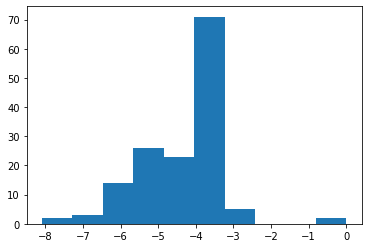

deferral_payments


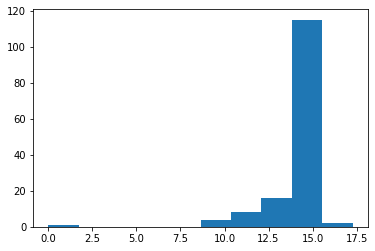

director_fees


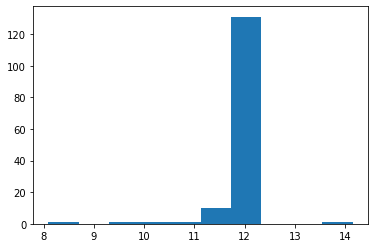

exercised_stock_options


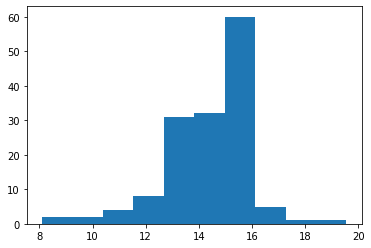

expenses


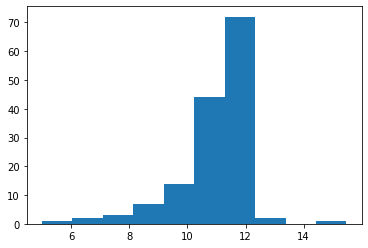

from_messages


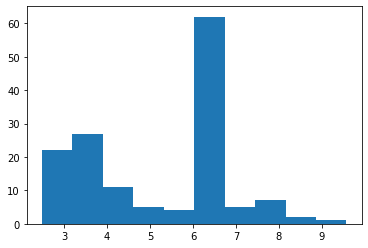

from_poi_to_this_person


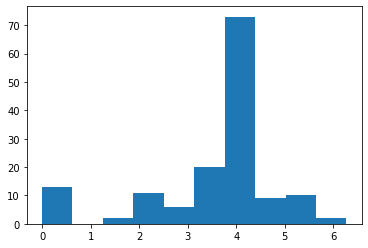

from_this_person_to_poi


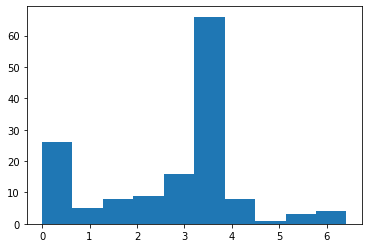

loan_advances


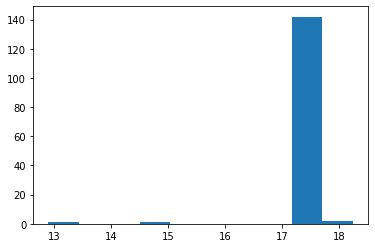

long_term_incentive


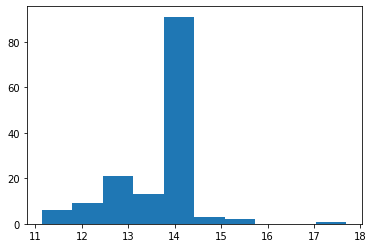

other


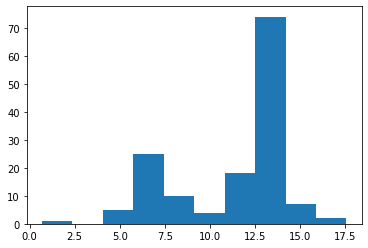

restricted_stock


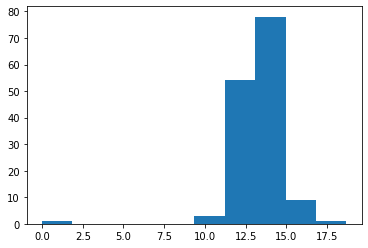

restricted_stock_deferred


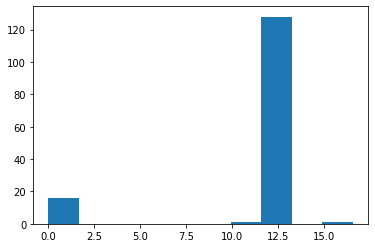

salary


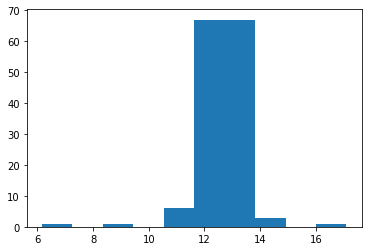

shared_receipt_with_poi


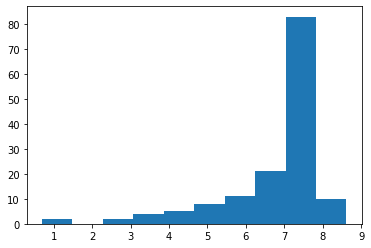

to_messages


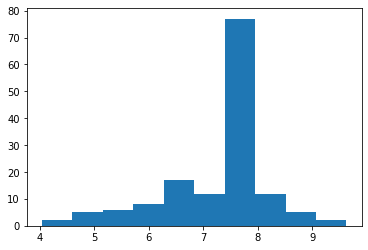

total_payments


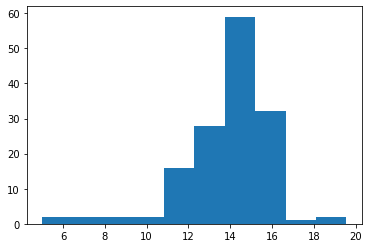

total_stock_value


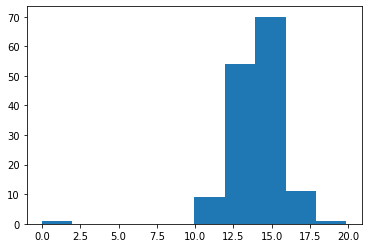

In [722]:
#看一下個欄位分佈圖
dtype_select = [float]
numeric_columns = list(df_mn.columns[list(df_mn.dtypes.isin(dtype_select))])

for col in numeric_columns:
    print(col)
    plt.hist(df_mn[col])
    plt.show()

In [723]:
# 將資料最大最小化
df_mn = MinMaxScaler().fit_transform(df_mn)

# 將前述轉換完畢資料 df , 重新切成 train_X, test_X
train_num = train_Y.shape[0]
train_X = df_mn[:train_num]
test_X = df_mn[train_num:]

# Train Data結合
train_df = pd.concat([pd.DataFrame(train_X),train_Y],axis=1)
train_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,poi
0,0.497935,0.828047,0.0,0.648759,0.759450,0.549913,0.057206,0.596205,0.216209,0.870348,0.480890,0.674248,0.793476,0.726263,0.620335,0.765909,0.495265,0.558947,0.851239,1
1,0.645311,0.828047,0.0,0.648759,0.757017,0.505013,0.309999,0.714192,0.530458,0.870348,0.507101,0.551747,0.842301,0.726263,0.709194,0.874466,0.743933,0.754380,0.858594,1
2,0.181386,0.828047,0.0,0.648759,0.541290,0.481299,0.166292,0.409142,0.411593,0.870348,0.466381,0.804439,0.731869,0.726263,0.557595,0.481842,0.245950,0.653639,0.740545,1
3,0.394831,0.828047,0.0,0.648759,0.655111,0.638013,0.553986,0.665610,0.580058,0.870348,0.330265,0.771833,0.738563,0.726263,0.562823,0.804870,0.643802,0.672908,0.693847,1
4,0.454235,0.828047,0.0,0.648759,0.655111,0.524074,0.350587,0.844349,0.502022,0.870348,0.257981,0.325499,0.628521,0.726263,0.569082,0.883182,0.684165,0.639841,0.590468,1
5,0.537019,0.534367,0.0,0.648759,0.797931,0.598353,0.553986,0.665610,0.580058,0.870348,0.466381,0.430441,0.784448,0.726263,0.646868,0.804870,0.643802,0.441267,0.866876,1
6,0.537019,0.828047,0.0,0.648759,0.683703,0.563177,0.553986,0.665610,0.580058,0.870348,0.466381,0.664353,0.807567,0.726263,0.531005,0.804870,0.643802,0.535743,0.819054,1
7,0.448879,0.591647,0.0,0.648759,0.655111,0.450151,0.169864,0.874231,0.373981,0.870348,0.466381,0.642164,0.720147,0.726263,0.585858,0.800008,0.614204,0.633296,0.676546,1
8,0.673226,0.707049,0.0,0.648759,0.807542,0.621942,0.154999,0.767604,0.432418,0.994573,0.603036,0.916122,0.883440,0.726263,0.705932,0.895431,0.773294,0.924693,0.890388,1
9,0.355226,0.828047,0.0,0.648759,0.415611,0.644151,0.040588,0.630273,0.279446,0.870348,0.003918,0.682306,0.689499,0.726263,0.581453,0.767361,0.488816,0.622427,0.682020,1


# 特徵選擇

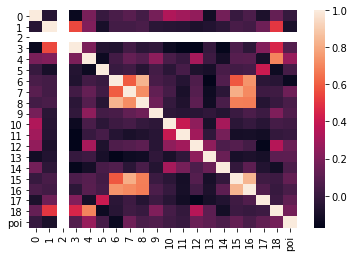

In [724]:
# 計算df整體相關係數, 並繪製成熱圖
import seaborn as sns
import matplotlib.pyplot as plt
corr = pd.DataFrame(train_df).corr()
sns.heatmap(corr,annot=False)
#annot=True 熱圖會有數字
plt.show()

In [725]:
# 新特徵 + 邏輯斯迴歸
high_list = list(corr[(corr['poi']>0.1) | (corr['poi']<-0.1)].index)
print(high_list)
high_list.pop(8) #移除 poi
print(high_list)

[4, 6, 7, 12, 13, 15, 17, 18, 'poi']
[4, 6, 7, 12, 13, 15, 17, 18]


In [726]:
# 新特徵 + 邏輯斯迴歸
#train_X = MMEncoder.fit_transform(train_df[high_list])
#cross_val_score(estimator, train_X, train_Y, cv=5).mean()

# Model 

In [727]:
# 使用三種模型 : 邏輯斯迴歸 / 梯度提升機 / 隨機森林, 參數使用 Random Search 尋找
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
lr = LogisticRegression(tol=0.001, penalty='l2', fit_intercept=True, C=1.0)
gdbt = GradientBoostingClassifier(tol=100, subsample=0.75, n_estimators=250, max_features=20,
                                  max_depth=6, learning_rate=0.03)
rf = RandomForestClassifier(n_estimators=100, min_samples_split=2, min_samples_leaf=1, 
                            max_features='sqrt', max_depth=6, bootstrap=True)

In [728]:
# 線性迴歸預測檔 (結果有部分隨機, 請以 Kaggle 計算的得分為準, 以下模型同理)
lr.fit(train_X, train_Y)
lr_pred = lr.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': lr_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('mid_lr.csv', index=False) 

In [729]:
# 隨機森林預測檔
rf.fit(train_X, train_Y)
rf_pred = rf.predict_proba(test_X)[:,1]
sub = pd.DataFrame({'name': ids, 'poi': rf_pred})
sub['poi'] = sub['poi'].map(lambda x:1 if x>0.5 else 0) 
sub.to_csv('mid_rf.csv', index=False)

In [730]:
# 混合泛化預測檔 
"""
Your Code Here
"""
blending_pred = lr_pred*0.5  + rf_pred*0.5
sub = pd.DataFrame({'name': ids, 'poi': blending_pred})
sub['poi'] =  sub['poi'].map(lambda x:1 if x>0.5 else 0)
sub.to_csv('mid_blending.csv', index=False)